In [13]:
import numpy as np
import os
from glob import glob
import pandas as pd
import itertools

from collections import OrderedDict
from tqdm.notebook import tqdm

# import pmi_accuracy.parser as parser
from pmi_accuracy.conll_data import CONLLReader, EXCLUDED_PUNCTUATION, CONLL_COLS
import sys
print(sys.path)

['/data/home/alsordon/pmi-dependencies', '/opt/caffe/python', '/opt/caffe2/build', '/data/home/alsordon/pmi-dependencies', '/data/anaconda/envs/pmienv/lib/python37.zip', '/data/anaconda/envs/pmienv/lib/python3.7', '/data/anaconda/envs/pmienv/lib/python3.7/lib-dynload', '', '/data/anaconda/envs/pmienv/lib/python3.7/site-packages', '/data/anaconda/envs/pmienv/lib/python3.7/site-packages/IPython/extensions', '/data/home/alsordon/.ipython']


In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

def show_pmi_plot(sent, mat, fig=None, ax=None, title=None):
    lim = max(abs(np.min(mat)), abs(np.max(mat)))
    if ax is None:
        fig, ax = plt.subplots()
    cax = ax.matshow(
        mat, cmap='PuOr',
        norm=colors.TwoSlopeNorm(vcenter=0, vmin=-lim, vmax=lim))
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cax, cax=cax1)
    ax.xaxis.set_major_locator(ticker.FixedLocator(range(len(sent))))
    ax.yaxis.set_major_locator(ticker.FixedLocator(range(len(sent))))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(sent))
    ax.yaxis.set_major_formatter(ticker.FixedFormatter(sent))
    ax.tick_params(axis="x", labelrotation=40)
    ax.set_xlabel('w2 (masked/unmasked conditioner)')
    ax.set_ylabel('w1 (target)')
    ax.yaxis.set_label_position("left")
    if title is not None:
        ax.set_title(title)
    plt.setp(ax.get_xticklabels(), rotation=35,
             ha="left", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=35,
             ha="right", rotation_mode="anchor")
    plt.show()
    
def plot_pmi_matrix(key_sen,pmi_matrix,title=None):
    sentence = key_sen.split(' ')[1:]
    show_pmi_plot(sent=sentence, mat=pmi_matrix, title=title)

In [61]:
CONNLX_FILE = 'ptb3-wsj-data/ptb3-wsj-dev.conllx'
OBSERVATIONS = CONLLReader(CONLL_COLS).load_conll_dataset(CONNLX_FILE) #not necessary... just for checking
RESULTS_DIR = "results-clean/contextual_embedding_models/"

MATRICES = dict()
MODELS = [
    "bart-large",
    "bert-base-cased",
    # "bert-base-uncased_checkpointed",
    # "bert-base-uncased_pad30_2020-08-07-07-28",
    "bert-large-cased",
    "bert-large-uncased",
    "distilbert-base-cased",
    "gpt2",
    "w2v",
    "xlm",
    "xlnet-base-cased",
    "xlnet-large-cased"]
for m in MODELS:
    resultsdir = glob(os.path.join(RESULTS_DIR,m+'*/'))[0]
    npzpath = os.path.join(resultsdir,'pmi_matrices.npz')
    MATRICES[m] = np.load(npzpath)

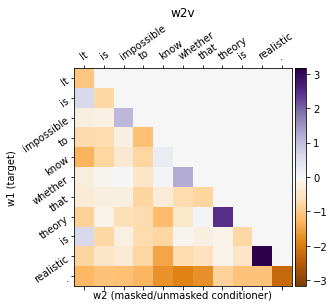

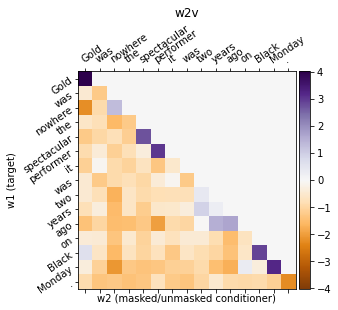

In [64]:
m = 'w2v'
for i in [442,1352]:
    key = list(MATRICES[m].keys())[i]
    mat = MATRICES[m][key]
    if not m == "w2v":
        mat = abs(mat)
    mat = np.tril(mat + mat.T)
    plot_pmi_matrix(key, mat, title=m)

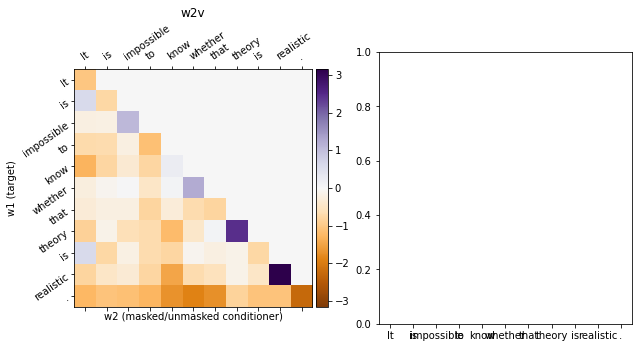

<Figure size 432x288 with 0 Axes>

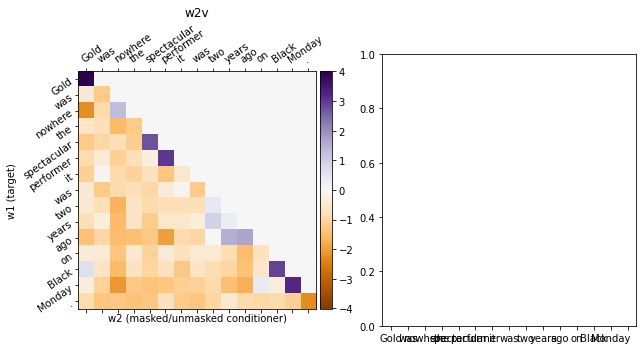

<Figure size 432x288 with 0 Axes>

In [70]:
selected_models = ['w2v','xlm']
for i in [442,1352]:
    # row of plots for sentence i
    figh = 5
    fig, plots = plt.subplots(
        nrows=1, sharex=True, ncols=len(selected_models),
        figsize=(len(selected_models)*figh,figh))
    for j,m in enumerate(selected_models):
        key = list(MATRICES[m].keys())[i]
        sentence = key.split(' ')[1:]
        mat = MATRICES[m][key]
        if not m == "w2v":
            mat = abs(mat)
        mat = np.tril(mat + mat.T)
        show_pmi_plot(
            sentence, mat, fig=fig, ax=plots[j], 
            title=m)
    plt.subplots_adjust(wspace=.5)
    plt.show()